## Difusi Neutron, Kasus Fix Source

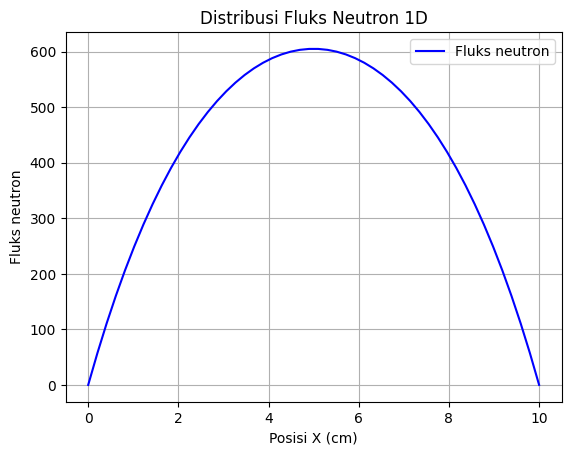

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
L = 10.0 #Panjang reaktor 1D (cm)
nx = 50 #Jumlah diskritisasi
D = 1.0 #Konstanta difusi (cm)
SigmaA = 0.1 #Penampang lintang absorpsi (/cm)
sumber = 100.0 #Sumber neutron (neutron/cm^3/s)

# Diskretisasi
dx = L/(nx-1)
x = np.linspace(0, L, nx)

# Matriks A dan sumber S
A = np.zeros((nx, nx))
S = np.zeros(nx)

# Pengisian matriks A dan vektor S
for i in range(1, nx-1):
    A[i, i-1] = -D/dx**2
    A[i, i] = (2*D)/dx**2 +SigmaA
    A[i, i+1] = -D/dx**2
    S[i] = sumber

# Kondisi batas: fluks di ujung domain
A[0, 0] = 1.0
A[-1, -1] = 1.0
S[0] = 0
S[-1] = 0

# Menyelesaikan sistem persamaan linier A . phi = S
phi = np.linalg.solve(A, S)

# Visulisasi
plt.plot(x, phi, label="Fluks neutron", color="blue")
plt.xlabel("Posisi X (cm)")
plt.ylabel("Fluks neutron")
plt.title("Distribusi Fluks Neutron 1D")
plt.legend()
plt.grid()
plt.show()

## Difusi Neutron, Kasus Eigenvalue

Konvergen setelah iterasi ke : 440


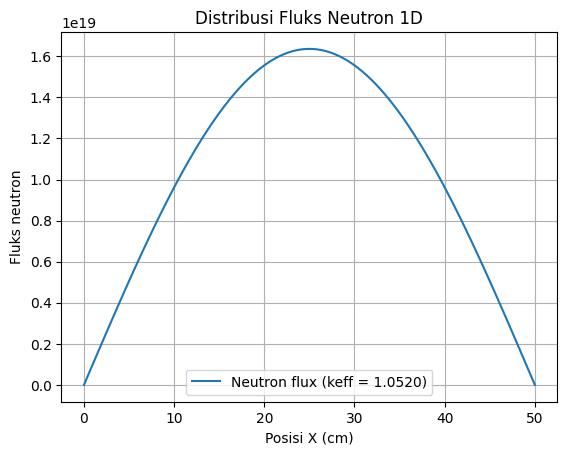

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
panjang = 50 #Panjang reaktor 1D (cm)
jumlahtitik = 100 #Jumlah diskritisasi

D = 2.0 #Konstanta difusi (cm)
sigmaA = 1.85 #Penampang lintang absorpsi (/cm)
nu_sigmaF = 3.87 #Nu dan Penampang lintang fisi (/cm)

dx = panjang/(jumlahtitik-1)
x = np.linspace(0, panjang, jumlahtitik)

phi = np.full(jumlahtitik, 1e19)
phi[0] = 0
phi[-1] = 0
keff = 1.0

toleransi_k = 1e-8
toleransi_phi = 1e-8
iterasimax = 50000
faktor_relaksasi = 0.9

for iterasi in range(iterasimax):
    phi_lama = phi.copy()
    keff_lama = keff

    S = (nu_sigmaF*phi_lama*dx)/keff_lama

    A = np.zeros((jumlahtitik, jumlahtitik))
    for i in range(1, jumlahtitik-1):
        A[i, i-1] = -D/dx**2
        A[i, i] = (2*D)/dx**2 +sigmaA
        A[i, i+1] = -D/dx**2
    # Syarat Batas
    A[0, 0] = 1.0
    A[-1, -1] = 1.0
    S[0] = 0
    S[-1] = 0

    phi_baru = np.linalg.solve(A,S)
    phi = faktor_relaksasi * phi_baru + (1-faktor_relaksasi) * phi_lama

    F_baru = np.sum(nu_sigmaF * phi * dx)
    F_lama = np.sum(nu_sigmaF * phi_lama * dx)
    keff = (F_baru/F_lama) * keff_lama

    konv_keff = abs((keff - keff_lama) / (keff + keff_lama))
    konv_phi = np.linalg.norm(phi - phi_lama) / np.linalg.norm(phi + phi_lama)

    if (konv_keff < toleransi_k) and (konv_phi < toleransi_phi):
        print(f'Konvergen setelah iterasi ke : {iterasi+1}')
        break

plt.plot(x, phi, label=f'Neutron flux (keff = {keff:.4f})')
plt.xlabel("Posisi X (cm)")
plt.ylabel("Fluks neutron")
plt.title("Distribusi Fluks Neutron 1D")
plt.legend()
plt.grid()
plt.show()